In [1]:
import torch
import nibabel as nib
import os
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import Dataset
import numpy as np
import time
from tqdm.auto import tqdm

/home/student/sinaziaee/mini_conda/miniconda3/envs/test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def make_img_path(cid):
    case_id = "case_{:05d}".format(cid)
    root=os.path.join('./data',case_id)
    return os.path.join(root,'imaging.nii.gz')

def make_seg_path(cid):
    case_id = "case_{:05d}".format(cid)
    root=os.path.join('./data',case_id)
    return os.path.join(root,'segmentation.nii.gz')

# case 0~ case 159 Train set, case 161~case209 Test set

# Since only case 160's image size is not 512X512, I discard case 160

In [3]:
if not os.path.exists('./kits19'):
    os.mkdir('./kits19')
if not os.path.exists('./kits19/train'):
    os.mkdir('./kits19/train')
if not os.path.exists('./kits19/valid'):
    os.mkdir('./kits19/valid')


In [4]:
count=0
root=os.path.join('.','kits19','train','image')
if not os.path.exists(root):
    os.mkdir(root)
    
for i in tqdm(range(160)):
    img=nib.load(make_img_path(i)).get_fdata()
    img=(img-img.min())/(max((img.max()-img.min()),1e-3))
    
    for j in range(len(img)):
        path=os.path.join(root,'{:05d}'.format(j+count))
        np.save(path,img[j:j+1].astype(np.float32))
    count+=len(img)


100%|██████████| 160/160 [04:36<00:00,  1.73s/it]


In [5]:
count=0
root=os.path.join('.','kits19','train','segmentation')
if not os.path.exists(root):
    os.mkdir(root)
    
for i in tqdm(range(160)):
    seg=nib.load(make_seg_path(i)).get_fdata()
    seg_no_cancer=np.where(seg>0,1,0).astype(np.uint8)
    
    for j in range(len(seg_no_cancer)):
        path=os.path.join(root,'{:05d}'.format(j+count))
        seg_1ch=torch.tensor(seg_no_cancer[j:j+1],dtype=torch.int64)
        seg_2ch=F.one_hot(seg_1ch,num_classes=2)
        seg_2ch=torch.squeeze(seg_2ch.permute(3,0,1,2))
        seg_2ch=np.array(seg_2ch,dtype=np.uint8)
        np.save(path,seg_2ch)
    count+=len(seg_no_cancer)

100%|██████████| 160/160 [06:57<00:00,  2.61s/it]


In [6]:
count=0
root=os.path.join('.','kits19','valid','image')
if not os.path.exists(root):
    os.mkdir(root)
    
for i in tqdm(range(161,210)):
    img=nib.load(make_img_path(i)).get_fdata()
    img=(img-img.min())/(max((img.max()-img.min()),1e-3))
    
    for j in range(len(img)):
        path=os.path.join(root,'{:05d}'.format(j+count))
        np.save(path,img[j:j+1].astype(np.float32))
    count+=len(img)

100%|██████████| 49/49 [01:00<00:00,  1.24s/it]


In [ ]:
count=0
root=os.path.join('.','kits19','valid','segmentation')
if not os.path.exists(root):
    os.mkdir(root)
    
for i in tqdm(range(161,210)):
    seg=nib.load(make_seg_path(i)).get_fdata()
    seg_no_cancer=np.where(seg>0,1,0).astype(np.uint8)
    
    for j in range(len(seg_no_cancer)):
        path=os.path.join(root,'{:05d}'.format(j+count))
        seg_1ch=torch.tensor(seg_no_cancer[j:j+1],dtype=torch.int64)
        seg_2ch=F.one_hot(seg_1ch,num_classes=2)
        seg_2ch=torch.squeeze(seg_2ch.permute(3,0,1,2))
        seg_2ch=np.array(seg_2ch,dtype=np.float32)
        np.save(path,seg_2ch)
    count+=len(seg_no_cancer)

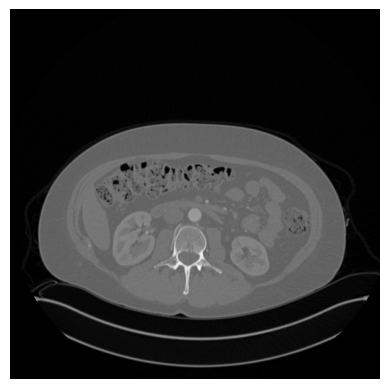

In [11]:
import numpy as np


import matplotlib.pyplot as plt
def show_file(filepath='kits19/train/image/00243.npy'):
    data = np.load(filepath)[0]
    plt.imshow(data, cmap='gray')
    plt.axis('off')
    plt.show()
show_file()

In [18]:
one_path = '/scratch/student/sinaziaee/datasets/3d_dataset/training/images/kidney_0001_0000.nii.gz'
img=nib.load(one_path).get_fdata()
print(img.shape)
# img = torch.tensor(img).permute(2, 0, 1)
img = img.transpose(2, 0, 1)
img = np.array(img, dtype=np.float32)
print(img.shape)

(512, 512, 240)
(240, 512, 512)


In [47]:
import pickle
with open('final_result2/history_8.pkl', 'rb') as f:
    # Load the object from the file
    obj = pickle.load(f)

# Print the text inside the object
print(obj)

{'train_loss': [array(0.6085346, dtype=float32), array(0.15715662, dtype=float32), array(0.10076673, dtype=float32), array(0.06933925, dtype=float32), array(0.0683753, dtype=float32), array(0.04255267, dtype=float32), array(0.05339424, dtype=float32), array(0.03612537, dtype=float32)], 'valid_loss': [array(0.6754972, dtype=float32), array(0.5836087, dtype=float32), array(0.58642966, dtype=float32), array(0.6947183, dtype=float32), array(0.5583774, dtype=float32), array(0.54395866, dtype=float32), array(0.5452561, dtype=float32), array(0.55862284, dtype=float32)], 'dice_valid_score': [array(0.32899353, dtype=float32), array(0.44552085, dtype=float32), array(0.6627683, dtype=float32), array(0.7120666, dtype=float32), array(0.71855617, dtype=float32), array(0.76594585, dtype=float32), array(0.75758046, dtype=float32), array(0.7239147, dtype=float32)]}


In [20]:
# img=nib.load(make_img_path(i)).get_fdata()

img=(img-img.min())/(max((img.max()-img.min()),1e-3))

for j in range(len(img)):
    path=os.path.join('./test','{:05d}'.format(j+count))
    np.save(path,img[j:j+1].astype(np.float32))


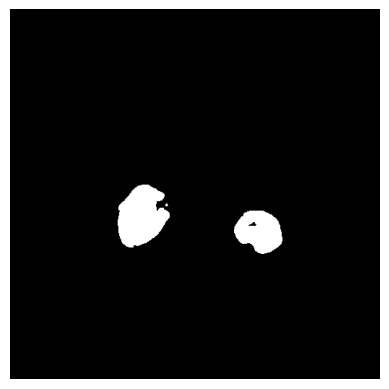

In [41]:
data = np.load('kits19/train/segmentation/01651.npy')[1]
plt.imshow(data, cmap='gray')
plt.axis('off')
plt.show()

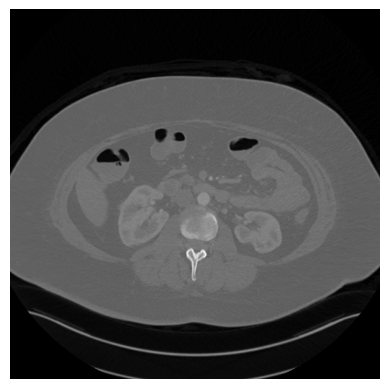

In [37]:
show_file('kits19/train/image/01651.npy')